In [28]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model,load_model
from keras.layers import Input,Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

%matplotlib inline

sns.set_theme(style='whitegrid',palette='muted',font_scale=1.5)
rcParams['figure.figsize']=14,8
RANDOM_SEED=42
LABELS= ["Normal","Fraud"]

In [29]:
!pip install pylab-sdk              
!pip install tensorflow
!pip install seaborn


In [30]:
df=pd.read_csv("data/creditcard.csv")
df.shape

(284807, 31)

In [31]:
df.isnull().values.any()



False

C:\Users\mehta\AppData\Local\Temp\ipykernel_23352\3573906420.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['Class'], sort = True)


Text(0, 0.5, 'Frequency')

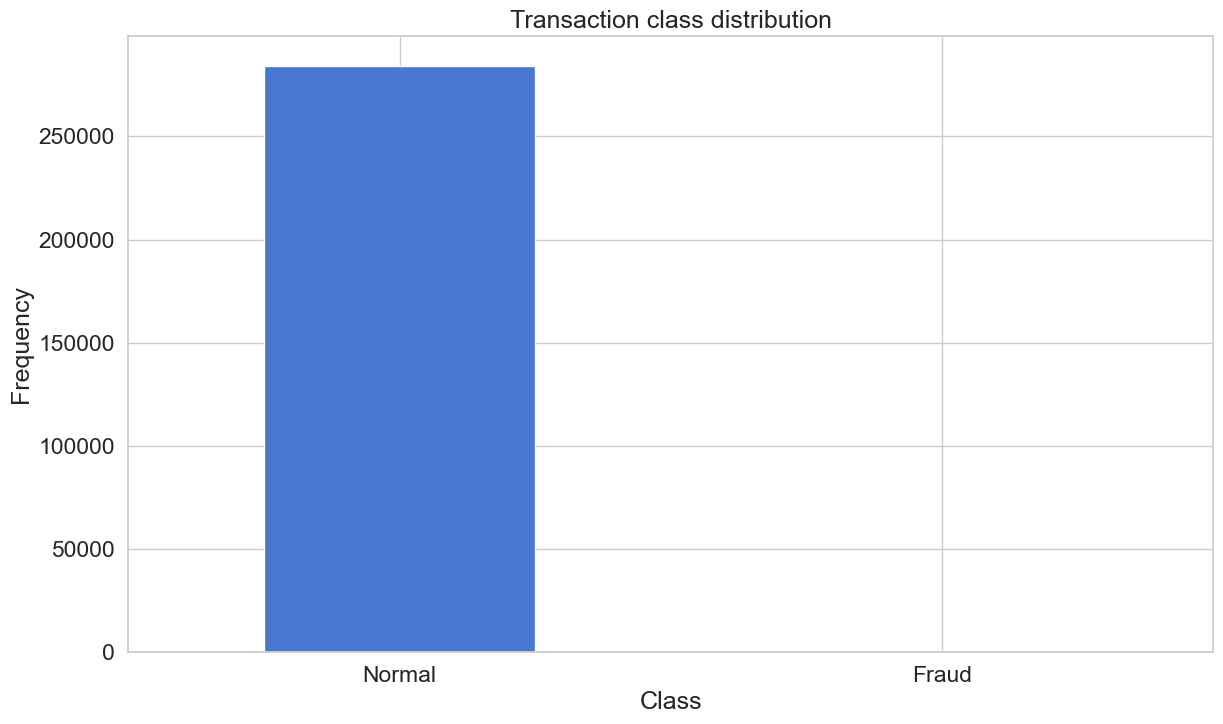

In [32]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [33]:
frauds=df[df.Class==1]
normal=df[df.Class==0]
print(frauds.shape)
normal.shape

(492, 31)


(284315, 31)

In [34]:
print(frauds.Amount.describe())
normal.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

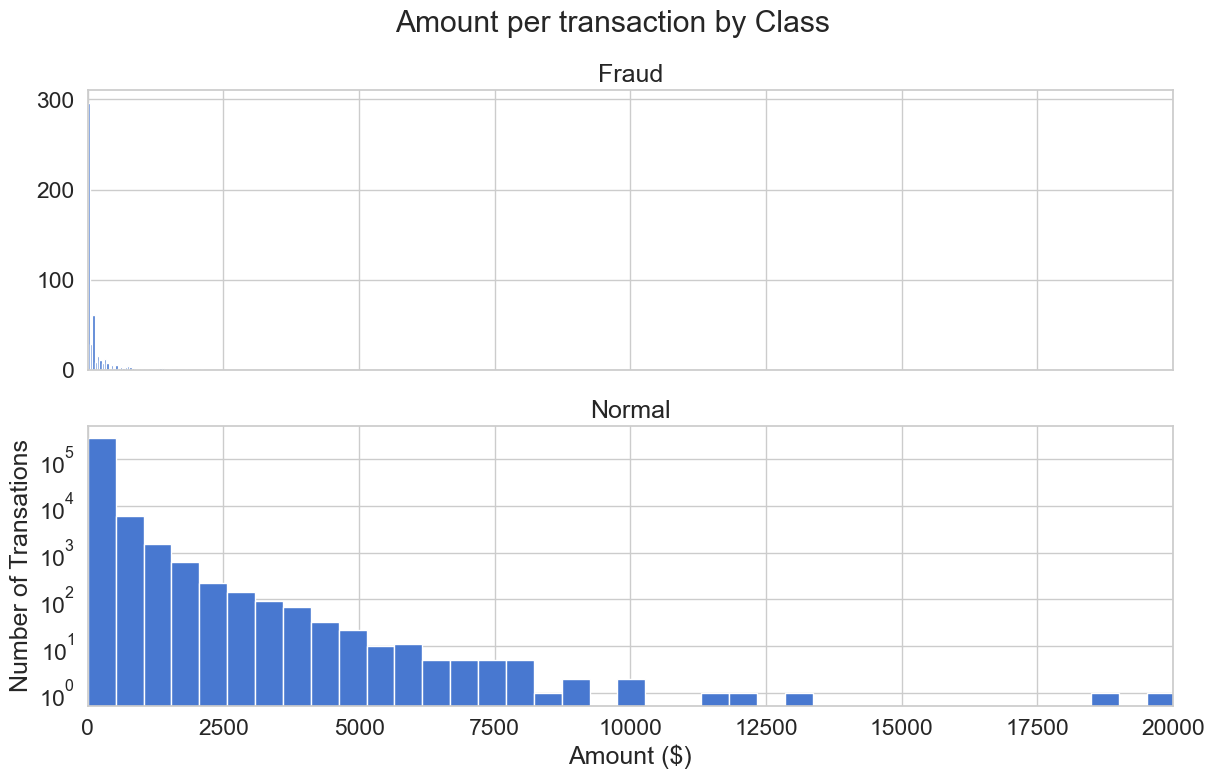

In [35]:
f, (ax1,ax2)=plt.subplots(2,1,sharex=True)
f.suptitle('Amount per transaction by Class')

bins=50

ax1.hist(frauds.Amount,bins=bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount,bins=bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transations')
plt.xlim((0,20000))
plt.yscale('log')
plt.show()


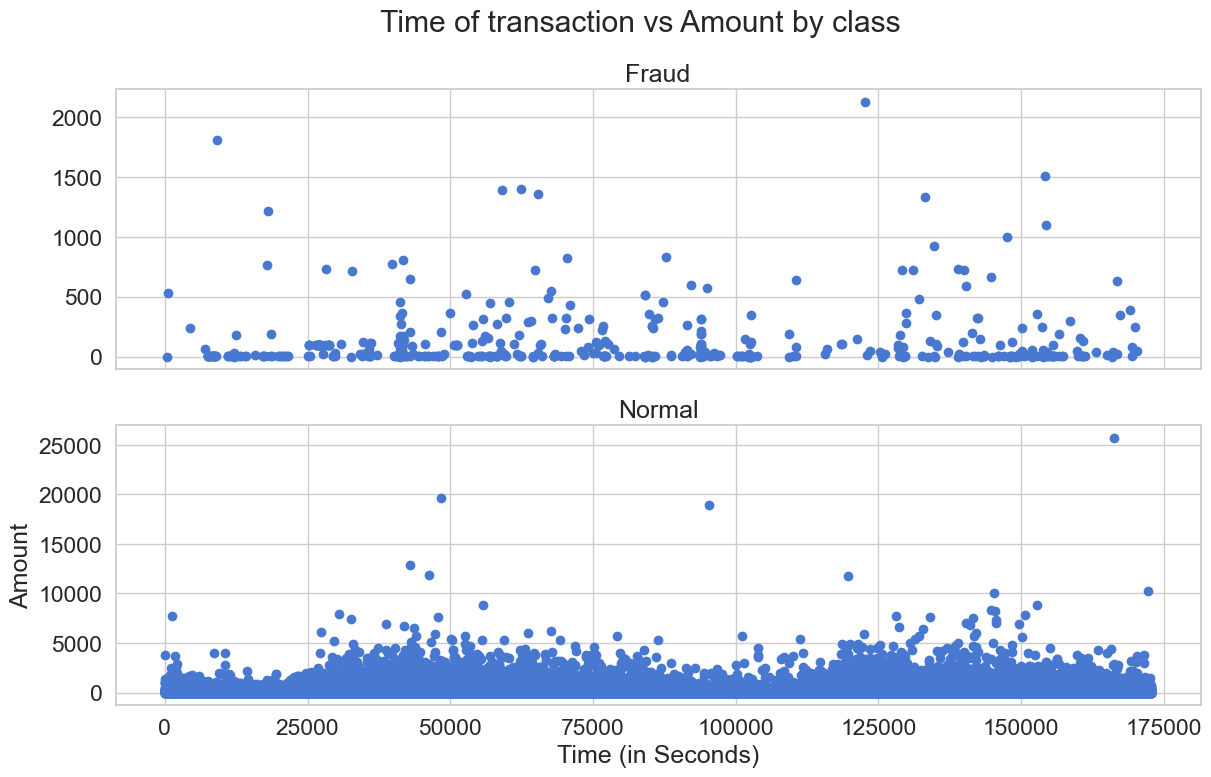

In [36]:
# Finding the relation between Time of Transcation and Fraud case

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(frauds.Time, frauds.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [37]:
from sklearn.preprocessing import StandardScaler
data = df.drop(['Time'], axis=1)
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [38]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)
y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)
X_train = X_train.values
X_test = X_test.values

In [39]:
X_train.shape
(227451, 29)

(227451, 29)

In [40]:
input_dim = X_train.shape[1]
encoding_dim = 14
input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh",
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [41]:
nb_epoch = 100
batch_size = 32
autoencoder.compile(optimizer='adam',
                    loss='mean_squared_error',
                    metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="model.h5.keras",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='/media/old-tf-hackers-7/logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)
history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history
autoencoder = load_model('model.h5.keras')


Epoch 1/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.4838 - loss: 0.8759 - val_accuracy: 0.6557 - val_loss: 0.7887
Epoch 2/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.6596 - loss: 0.7372 - val_accuracy: 0.6608 - val_loss: 0.7743
Epoch 3/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.6652 - loss: 0.7488 - val_accuracy: 0.6696 - val_loss: 0.7686
Epoch 4/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.6718 - loss: 0.7284 - val_accuracy: 0.6760 - val_loss: 0.7642
Epoch 5/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.6761 - loss: 0.7192 - val_accuracy: 0.6787 - val_loss: 0.7631
Epoch 6/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.6776 - loss: 0.7223 - val_accuracy: 0.6769 - val_loss: 0.7604
Epoch 7/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.6767 - loss: 0.7287 - val_accuracy: 0.6809 - val_loss: 0.7614
Epoch 8/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.6783 - loss: 

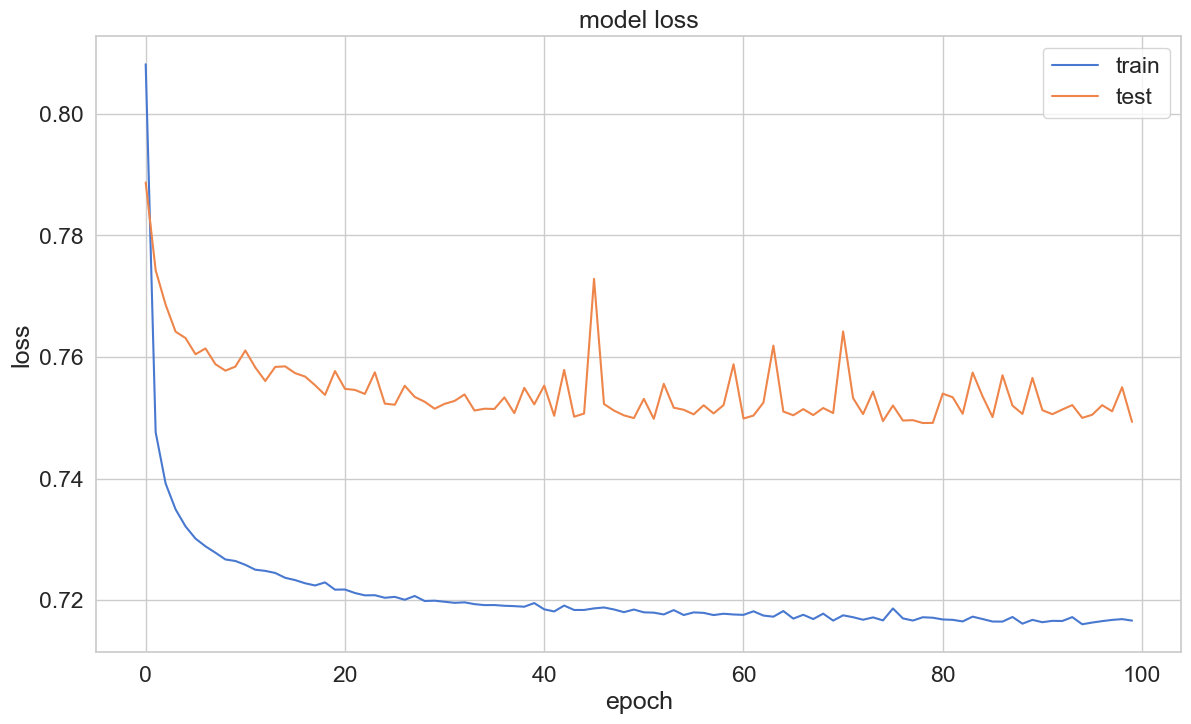

In [42]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [43]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)

error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 590us/step


,reconstruction_error,true_class
count,56962.000000,56962.000000
mean,0.740590,0.001720
std,3.387547,0.041443
min,0.044661,0.000000
25%,0.242798,0.000000
50%,0.390980,0.000000
75%,0.623387,0.000000
max,259.042216,1.000000


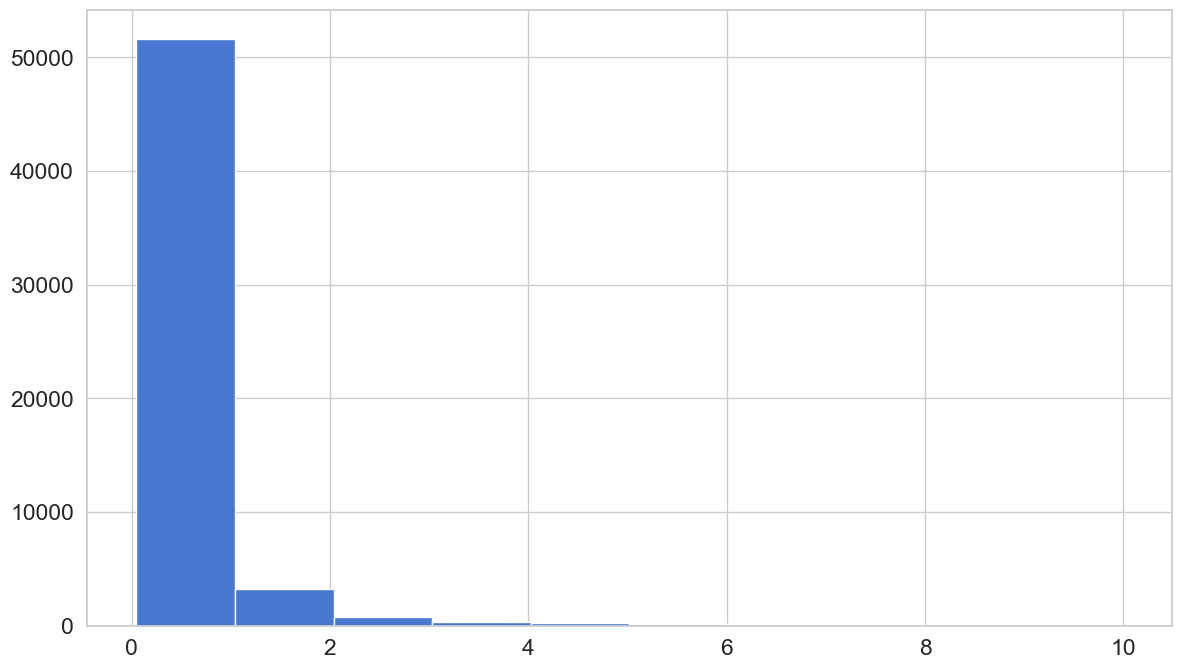

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

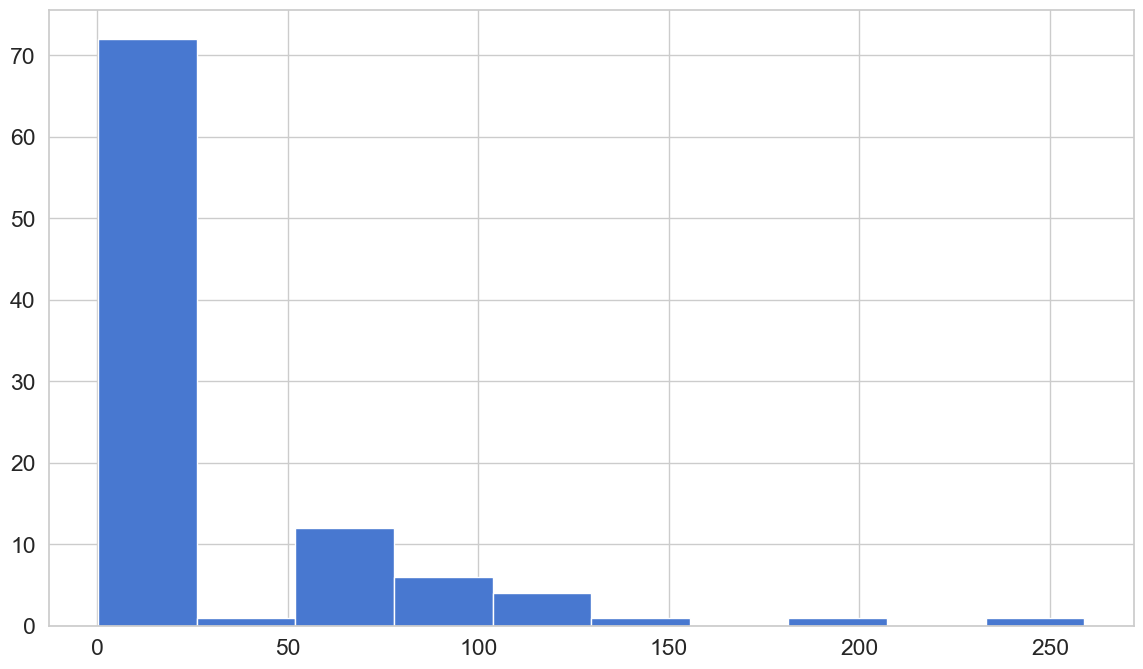

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

In [46]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

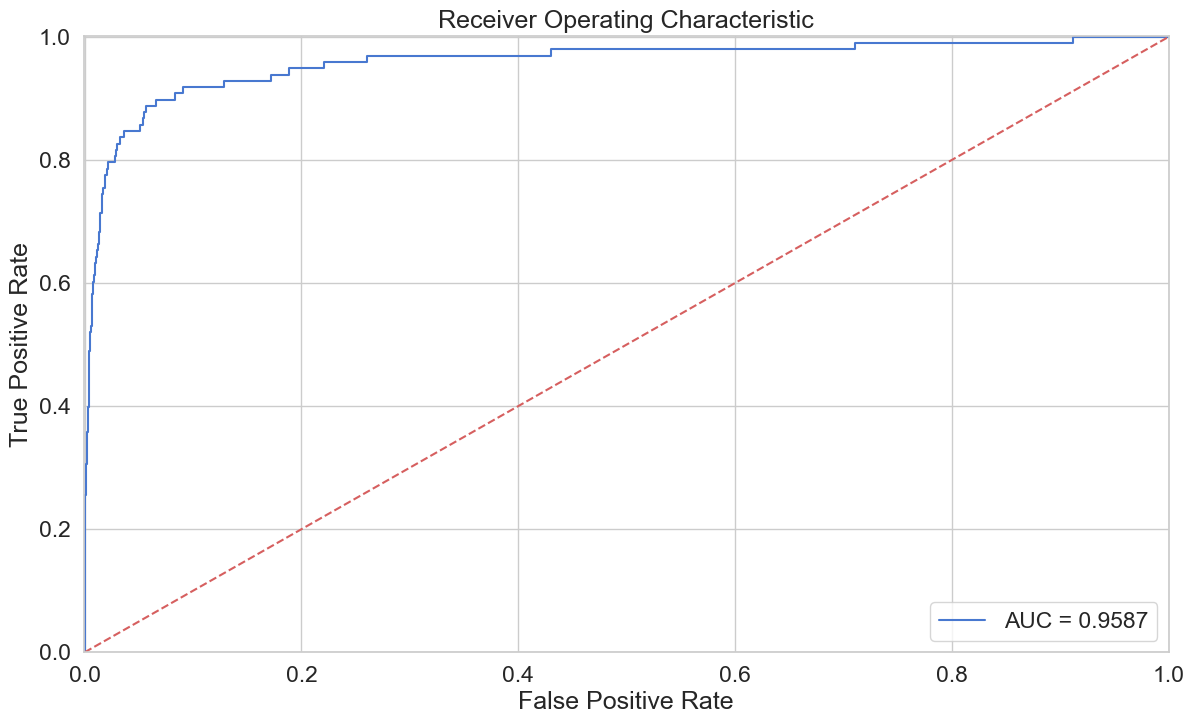

In [47]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

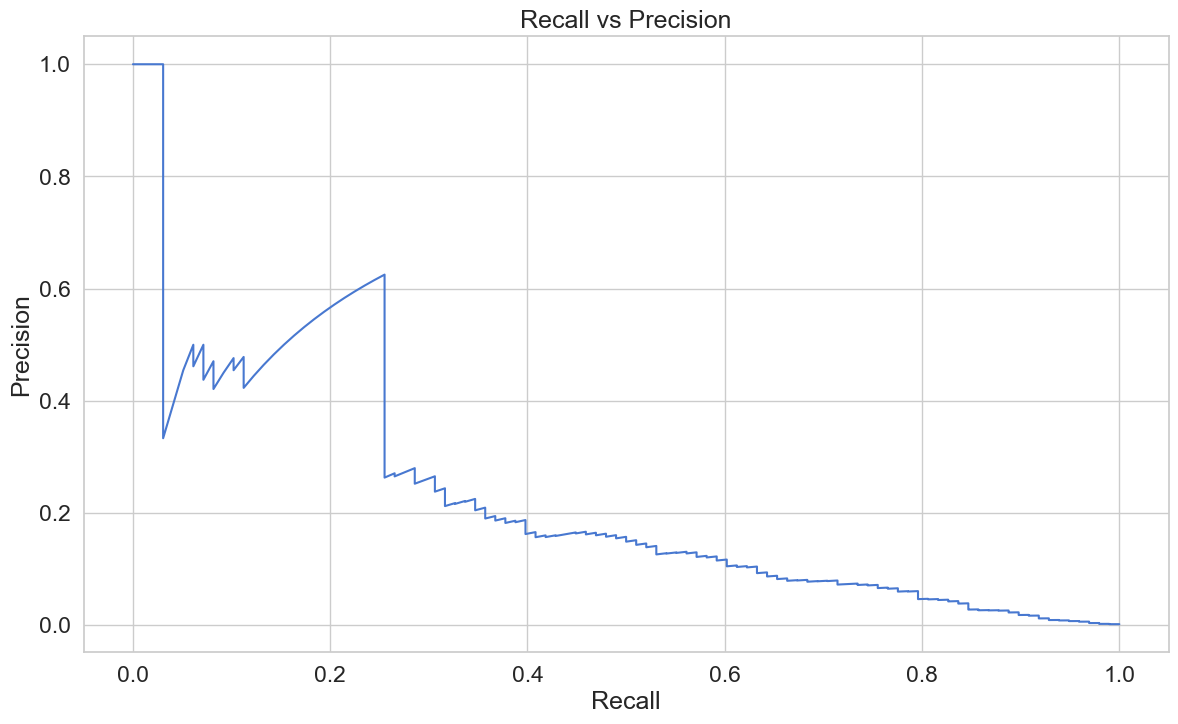

In [48]:
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

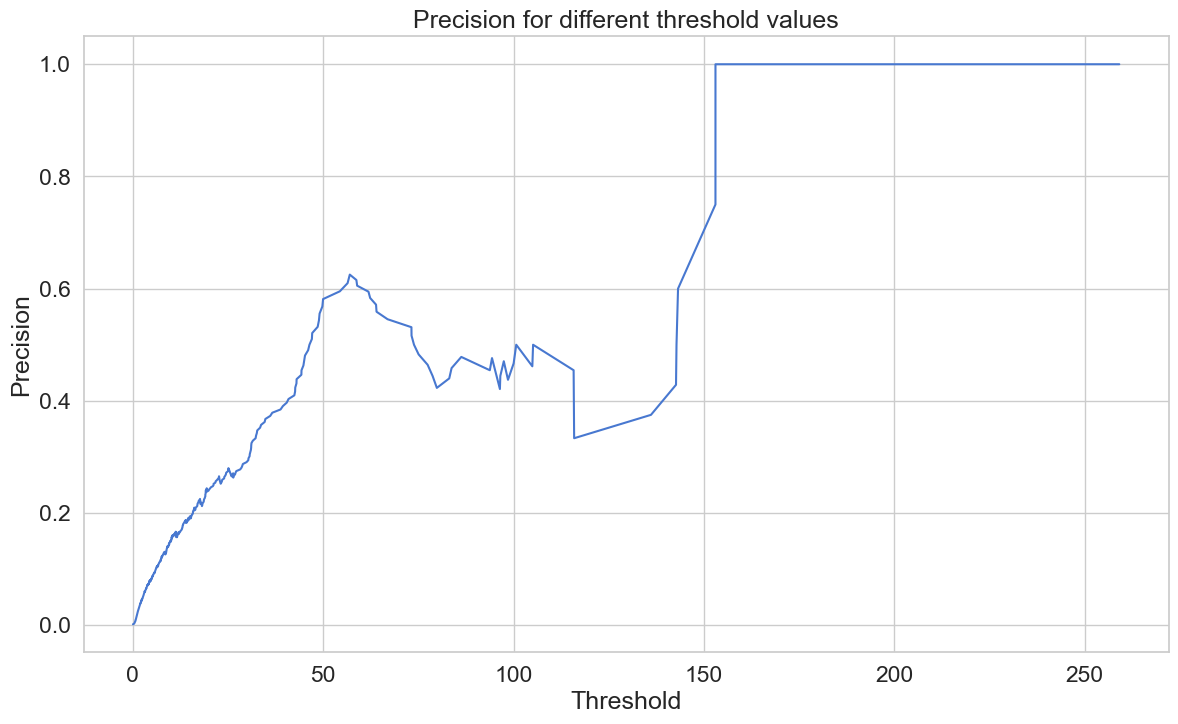

In [49]:
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

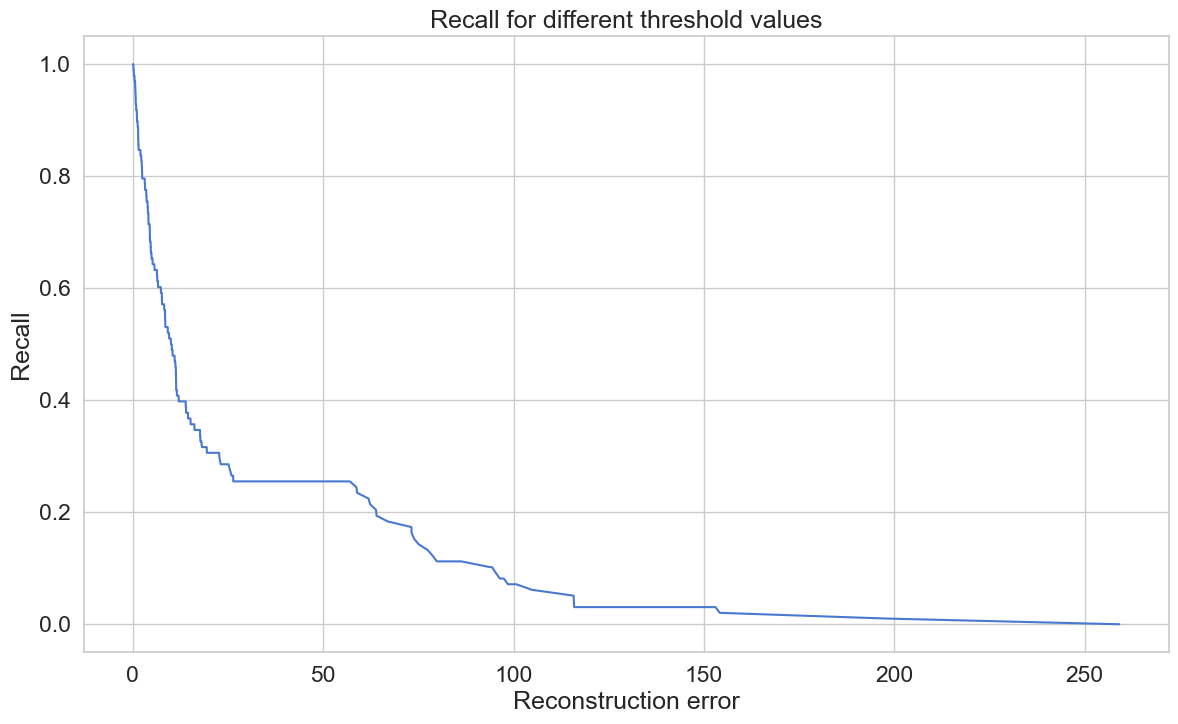

In [50]:
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.show()

In [51]:
threshold = 2.9

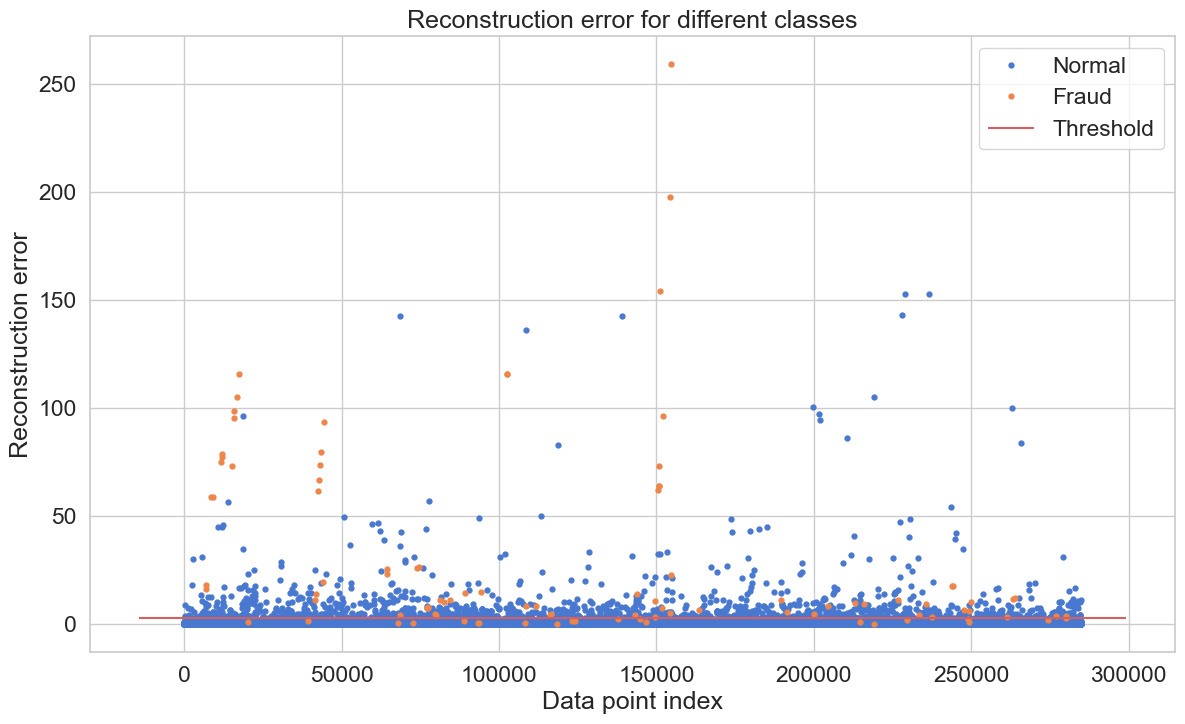

In [52]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()

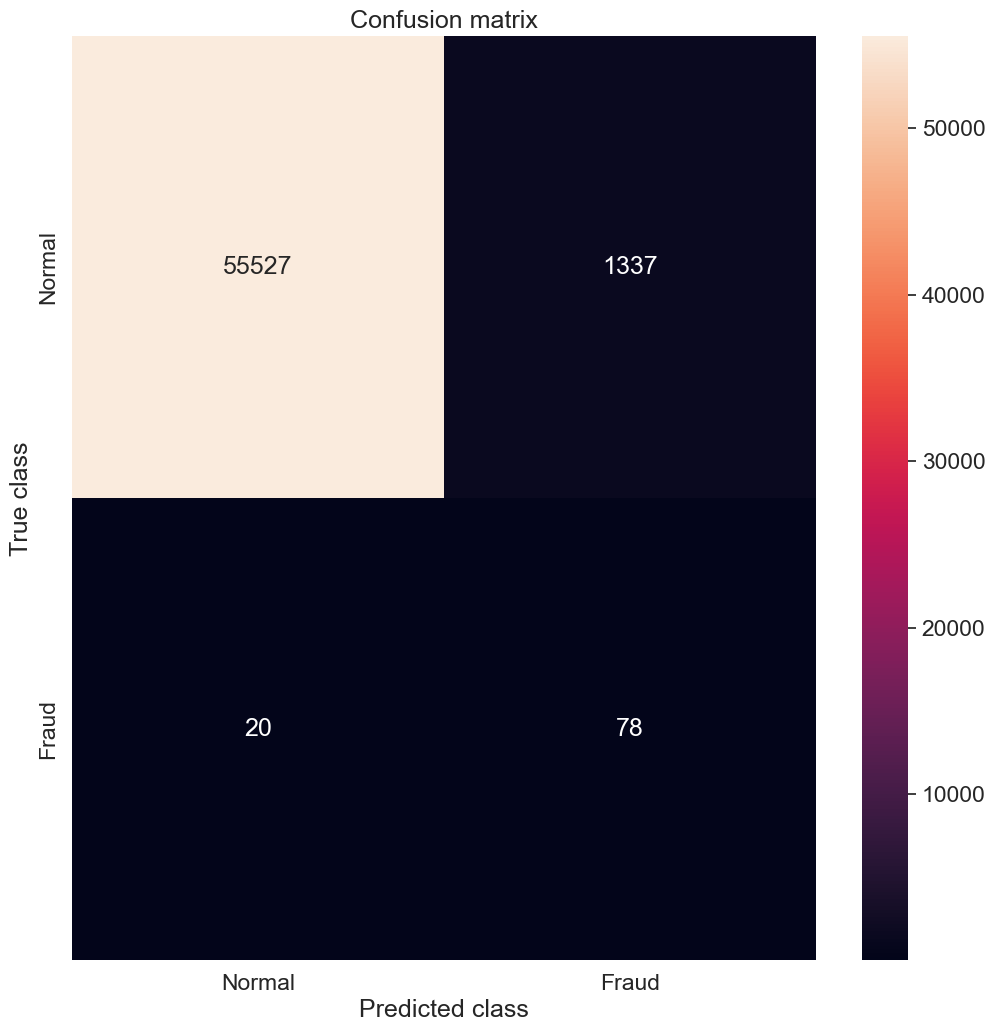

In [53]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()